<a href="https://colab.research.google.com/github/nytrp/sistemas-inteligentes-para-electronica/blob/main/Copia_de_Untitled0.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Redes neuronales recurrentes RNN**

## Grupo:
### Alejandro Martinez, Yurliana Niebles, Isaac Montes, Daniel Santiago



# ¿Que es una red neuronal recurrente?

Una red neuronal recurrente (RNN) es un tipo de red neuronal profunda diseñada para procesar datos secuenciales como series de tiempo, texto, voz o secuencias de eventos, generando salidas que también respetan ese orden.

A diferencia de una red neuronal tradicional (feed-forward), que asume que cada entrada es independiente, una RNN mantiene información de estados anteriores y la utiliza para influir en las predicciones actuales. Esto le permite modelar relaciones de contexto temporal.

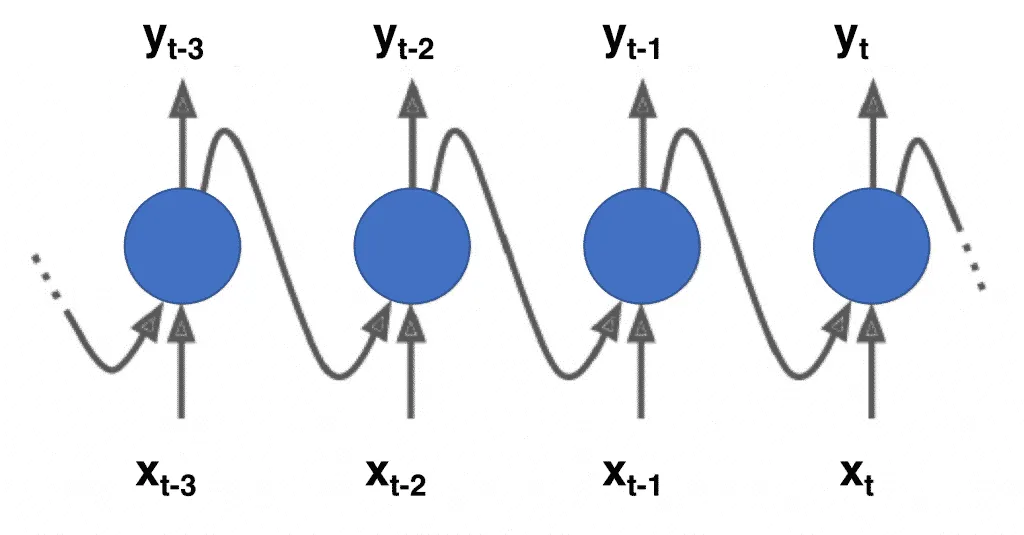


# ¿Cómo funciona?

La representación de una red neuronal recurrente muestra cómo la misma neurona se aplica en distintos instantes de tiempo $t$, recibiendo la entrada $x_t$ y produciendo una salida $y_t$. El estado oculto $a_{t-1}$ se retroalimenta al siguiente paso, actuando como memoria del contexto previo y permitiendo que la red recuerde información anterior para influir en la salida presente. Todas las neuronas comparten los mismos pesos, lo que hace posible procesar secuencias de distinta longitud sin modificar la arquitectura. El entrenamiento se realiza mediante retropropagación a través del tiempo (BPTT), ajustando los parámetros en cada paso para que la información relevante fluya a través del estado oculto y mejore las predicciones. En resumen, una RNN es capaz de capturar dependencias temporales en los datos gracias a su memoria interna.





# ¿Para qué sirve?


Las redes neuronales recurrentes tienen aplicaciones en cualquier dominio donde los datos sean secuenciales y el orden sea importante. Se utilizan ampliamente en procesamiento de lenguaje natural, como traducción automática, generación de texto o análisis de sentimientos; en reconocimiento de voz y audio, permitiendo transcribir o responder manteniendo en memoria lo ya escuchado; en la predicción de series temporales, como precios financieros, pronóstico del clima o detección de anomalías en sensores; y en visión secuencial, al combinarse con redes convolucionales para subtitular imágenes o videos y describir escenas de forma coherente. En resumen, las RNN destacan en tareas donde se debe modelar una secuencia de eventos o señales, ya que su capacidad de recordar el contexto previo les permite tomar decisiones más precisas en aplicaciones del mundo real.

 # ¿Ventajas y desventaja?

Las RNN son muy potentes para trabajar con datos secuenciales porque pueden recordar información previa y adaptarse a secuencias de cualquier longitud. Sin embargo, su entrenamiento suele ser lento y complejo, y pueden tener problemas para aprender dependencias muy largas.

**Ventajas:**

- Memoria a corto y largo plazo (con LSTM o GRU).

- Manejan secuencias de distinta longitud sin cambiar la arquitectura.

- Buenas para datos donde el orden importa (texto, voz, series temporales).

- Pueden combinarse con otras redes como CNN para tareas más complejas.

**Desventajas:**

- Problemas de gradiente (explosivo o desvaneciente).

- Entrenamiento lento y costoso por su naturaleza secuencial.

- Dificultad para capturar dependencias muy largas.

- Más complicadas de ajustar e interpretar que modelos clásicos.

- Menos eficientes que arquitecturas modernas como los Transformers.


In [ ]:
!pip install pandas
!pip install numpy
!pip install matplotlib
!pip install tensorflow


Saving electricity.csv to electricity (1).csv
                  date     0     1      2      3      4       5     6       7  \
0  2016-07-01 02:00:00  14.0  69.0  234.0  415.0  215.0  1056.0  29.0   840.0   
1  2016-07-01 03:00:00  18.0  92.0  312.0  556.0  292.0  1363.0  29.0  1102.0   
2  2016-07-01 04:00:00  21.0  96.0  312.0  560.0  272.0  1240.0  29.0  1025.0   
3  2016-07-01 05:00:00  20.0  92.0  312.0  443.0  213.0   845.0  24.0   833.0   
4  2016-07-01 06:00:00  22.0  91.0  312.0  346.0  190.0   647.0  16.0   733.0   

       8  ...    311    312      313     314     315   316   317     318  \
0  226.0  ...  676.0  372.0  80100.0  4719.0  5002.0  48.0  38.0  1558.0   
1  271.0  ...  805.0  452.0  95200.0  4643.0  6617.0  65.0  47.0  2177.0   
2  270.0  ...  817.0  430.0  96600.0  4285.0  6571.0  64.0  43.0  2193.0   
3  179.0  ...  801.0  291.0  94500.0  4222.0  6365.0  65.0  39.0  1315.0   
4  186.0  ...  807.0  279.0  91300.0  4116.0  6298.0  75.0  40.0  1378.0   

     319  

/usr/local/lib/python3.12/dist-packages/keras/src/layers/rnn/rnn.py:199: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ lstm_3 (LSTM)                   │ (None, 48, 128)        │        66,560 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 48, 128)        │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_4 (LSTM)                   │ (None, 48, 64)         │        49,408 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_3 (Dropout)             │ (None, 48, 64)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_5 (LSTM)                   │ (None, 32)             │        12,416 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 1)              │            33 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 128,417 (501.63 KB)

 Trainable params: 128,417 (501.63 KB)

 Non-trainable params: 0 (0.00 B)

None
Epoch 1/20
263/263 ━━━━━━━━━━━━━━━━━━━━ 44s 152ms/step - loss: 0.0172 - val_loss: 0.0034
Epoch 2/20
263/263 ━━━━━━━━━━━━━━━━━━━━ 39s 149ms/step - loss: 0.0038 - val_loss: 0.0015
Epoch 3/20
263/263 ━━━━━━━━━━━━━━━━━━━━ 39s 150ms/step - loss: 0.0022 - val_loss: 0.0011
Epoch 4/20
263/263 ━━━━━━━━━━━━━━━━━━━━ 40s 151ms/step - loss: 0.0017 - val_loss: 0.0014
Epoch 5/20
263/263 ━━━━━━━━━━━━━━━━━━━━ 40s 151ms/step - loss: 0.0016 - val_loss: 0.0015
Epoch 6/20
263/263 ━━━━━━━━━━━━━━━━━━━━ 41s 150ms/step - loss: 0.0015 - val_loss: 0.0012
Epoch 7/20
263/263 ━━━━━━━━━━━━━━━━━━━━ 42s 159ms/step - loss: 0.0012 - val_loss: 8.4135e-04
Epoch 8/20
263/263 ━━━━━━━━━━━━━━━━━━━━ 39s 150ms/step - loss: 0.0011 - val_loss: 6.1678e-04
Epoch 9/20
263/263 ━━━━━━━━━━━━━━━━━━━━ 42s 160ms/step - loss: 0.0011 - val_loss: 6.6245e-04
Epoch 10/20
263/263 ━━━━━━━━━━━━━━━━━━━━ 40s 151ms/step - loss: 9.2140e-04 - val_loss: 6.2337e-04
Epoch 11/20
263/263 ━━━━━━━━━━━━━━━━━━━━ 42s 154ms/step - loss: 9.5444e-04 - val_los

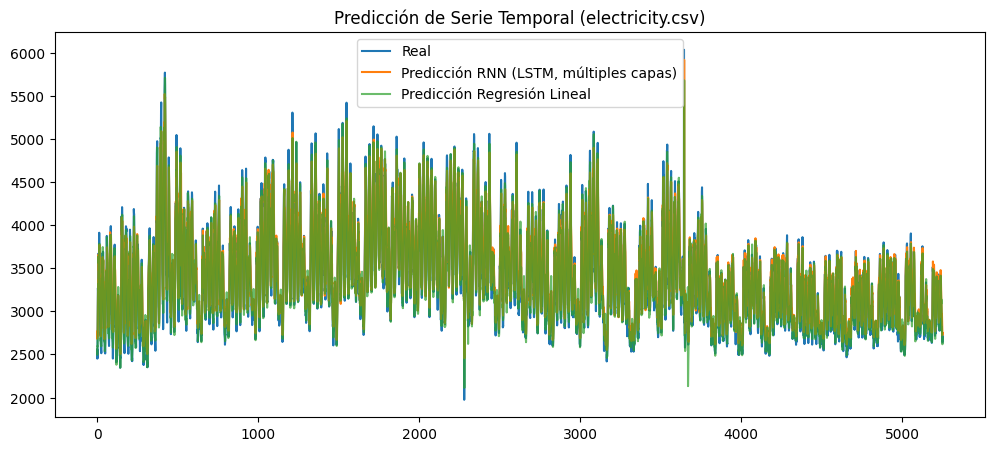

In [2]:
# =======================================
# 1. Subir archivo desde tu PC
# =======================================
from google.colab import files
uploaded = files.upload()   # Selecciona electricity.csv

# =======================================
# 2. Importar librerías
# =======================================
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout

# =======================================
# 3. Cargar dataset
# =======================================
df = pd.read_csv("electricity.csv")
print(df.head())
print(df.shape)

# Usar última columna como objetivo (ajusta si es necesario)
target_col = df.columns[-1]
print("Usando la columna objetivo:", target_col)

# =======================================
# 4. Normalización
# =======================================
scaler = MinMaxScaler()
scaled = scaler.fit_transform(df[[target_col]])

# =======================================
# 5. Crear ventanas de secuencia
# =======================================
def create_sequences(data, seq_length=48):  # ventana de 48 pasos
    X, y = [], []
    for i in range(len(data)-seq_length):
        X.append(data[i:i+seq_length])
        y.append(data[i+seq_length])
    return np.array(X), np.array(y)

seq_length = 48
X, y = create_sequences(scaled, seq_length)

# División en train/test
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, shuffle=False
)

print("Shapes ->", X_train.shape, y_train.shape, X_test.shape, y_test.shape)

# =======================================
# 6. Modelo RNN con múltiples capas LSTM
# =======================================
model = Sequential([
    LSTM(128, return_sequences=True, input_shape=(seq_length, 1)),
    Dropout(0.2),
    LSTM(64, return_sequences=True),
    Dropout(0.2),
    LSTM(32),
    Dense(1)
])

model.compile(optimizer='adam', loss='mse')
print(model.summary())

# =======================================
# 7. Entrenamiento del modelo
# =======================================
history = model.fit(
    X_train, y_train,
    epochs=20, batch_size=64,  # más épocas
    validation_split=0.2
)

# =======================================
# 8. Evaluación del modelo RNN
# =======================================
preds = model.predict(X_test)
mse = mean_squared_error(y_test, preds)
r2 = r2_score(y_test, preds)
print(f"RNN - MSE: {mse:.4f}, R²: {r2:.4f}")

# =======================================
# 9. Comparación con Regresión Lineal
# =======================================
X_train_lr = X_train.reshape(X_train.shape[0], -1)
X_test_lr  = X_test.reshape(X_test.shape[0], -1)

lr = LinearRegression()
lr.fit(X_train_lr, y_train)
lr_preds = lr.predict(X_test_lr)

mse_lr = mean_squared_error(y_test, lr_preds)
r2_lr = r2_score(y_test, lr_preds)
print(f"Regresión Lineal - MSE: {mse_lr:.4f}, R²: {r2_lr:.4f}")

# =======================================
# 10. Visualización
# =======================================
plt.figure(figsize=(12,5))
plt.plot(scaler.inverse_transform(y_test.reshape(-1,1)), label="Real")
plt.plot(scaler.inverse_transform(preds), label="Predicción RNN (LSTM, múltiples capas)")
plt.plot(scaler.inverse_transform(lr_preds.reshape(-1,1)), label="Predicción Regresión Lineal", alpha=0.7)
plt.legend()
plt.title("Predicción de Serie Temporal (electricity.csv)")
plt.show()